In this notebook, we will plot the marginalized posterior distributions of some of the key cosmological parameters for weak lensing, e.g. the matter energy density of the universe $\Omega_m$ and the amplitude of fluctuations $\sigma_8$. 

# Get the data

As an example, let's download the main results from the Dark Energy Survey Year 3 3x2pt analysis (article here: https://arxiv.org/pdf/2105.13549.pdf). For more details about that analysis, check out:
- 3x2pt article: https://arxiv.org/pdf/2105.13549.pdf
- release page from the collaboration: https://www.darkenergysurvey.org/des-year-3-cosmology-results-papers/

The release page contains a link to the data release: https://des.ncsa.illinois.edu/releases/y3a2

The data we will use for this example is under "Y3 cosmology" > "Y3KP products" > "Cosmology chains". The file that we will use is "chain_3x2pt_lcdm_SR_maglim.txt", which corresponds to the main results of the article cited above.

# Read the data

Once the data file has been downloaded, we can use python to load all the columns.
The first thing we need to do is to import all the python modules we will need.

In [8]:
#allows visualizing plotted figures within the notebook:
%matplotlib inline 

import numpy as np #basic python module used to read files and handle arrays
import matplotlib.pyplot as plt #basic python module for plotting figures
from chainconsumer import ChainConsumer #python module to plot the cosmology contours https://samreay.github.io/ChainConsumer/

In [9]:
data = np.loadtxt("chain_3x2pt_lcdm_SR_maglim.txt").T

Now "data" is an N-dimensional array (ndarray) with all the columns of the file (ignoring the header). Therefore, data[0] corresponds to the first column and data[-1] to the last column of the file.

In [10]:
data[0]

array([0.37984936, 0.32555814, 0.28965091, ..., 0.37362434, 0.33725777,
       0.35522364])

The first line of the header of the file tells us the order of the columns:

cosmological_parameters--omega_m	cosmological_parameters--h0	cosmological_parameters--omega_b	cosmological_parameters--n_s	cosmological_parameters--a_s	cosmological_parameters--omnuh2	shear_calibration_parameters--m1	shear_calibration_parameters--m2	shear_calibration_parameters--m3	shear_calibration_parameters--m4	wl_photoz_errors--bias_1	wl_photoz_errors--bias_2	wl_photoz_errors--bias_3	wl_photoz_errors--bias_4	lens_photoz_errors--bias_1	lens_photoz_errors--bias_2	lens_photoz_errors--bias_3	lens_photoz_errors--bias_4	lens_photoz_errors--width_1	lens_photoz_errors--width_2	lens_photoz_errors--width_3	lens_photoz_errors--width_4	bias_lens--b1	bias_lens--b2	bias_lens--b3	bias_lens--b4	intrinsic_alignment_parameters--a1	intrinsic_alignment_parameters--a2	intrinsic_alignment_parameters--alpha1	intrinsic_alignment_parameters--alpha2	intrinsic_alignment_parameters--bias_ta	COSMOLOGICAL_PARAMETERS--SIGMA_8	COSMOLOGICAL_PARAMETERS--SIGMA_12	DATA_VECTOR--2PT_CHI2	prior	like	post	weight

# Plotting the contours

In order to plot the cosmology contours of $\Omega_m$ and $\sigma_8$, we will need the following columns:
1. **The samples of $\Omega_m$**: This corresponds to "cosmological_parameters--omega_m" in the header, so data[0].
2. **The samples of $\sigma_8$**: This corresponds to "COSMOLOGICAL_PARAMETERS--SIGMA_8" in the header, so data[31].
3. **The weights**: As explained in the documentation, they used polychord (a nested monte carlo sampler) to obtain the sampler. Therefore, we must weight the contribution of each sample according to the weight column. The weight column is the last one, so data[-1]

In [11]:
omega_m = data[0]
sig8 = data[31]
weights = data[-1]

You can plot these columns to make sure you're reading the right ones, and that the sampler converged to some value.

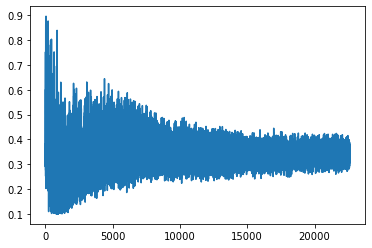

In [12]:
plt.plot(omega_m)

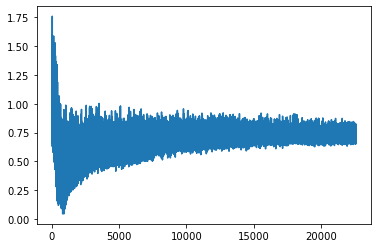

In [13]:
plt.plot(sig8)

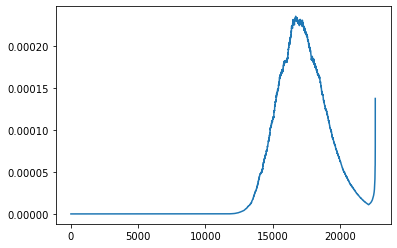

In [14]:
plt.plot(weights)

Now to plot the contours!

In [35]:
c = ChainConsumer() #This initializes the chainconsumer object/figure

combined_data = np.vstack((omega_m, sig8))
c.add_chain(combined_data.T, weights=weights, parameters=["$\Omega_m$", "$\sigma_8$"] , name='DES Y3 3x2pt')

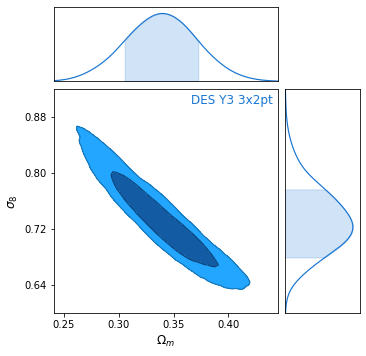

In [39]:
#Configure the colours and other settings of the figure:
c.configure(plot_hists=True,sigma2d=False,kde=1.3, linewidths=1.2, legend_kwargs={"loc": "upper right", "fontsize": 12},
            legend_color_text=True, legend_location=(-1, 0),diagonal_tick_labels=False, summary=False)
fig = c.plotter.plot(legend='t',figsize="column")
fig.savefig('omegams8.png', bbox_inches="tight", dpi=300, transparent=True, pad_inches=0.05)